In [2]:
#preliminary definitions

import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from io import StringIO
import io

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, h, k_B


#imported requests
import requests

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"bc47cc6e1bd83ad2708bc714f126dc09"}

#defined get()
def get(path, params=None):
    # make HTTP GET request to path
    headers = {"api-key":"bc47cc6e1bd83ad2708bc714f126dc09"}
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r


In [7]:
#definition to plot histogram for lookback times.
#input parameters: redshift, subhalo id

def LookbackTime_hist(redshift, ids):
    h = 0.6774
    cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)
    
    import h5py
    params = {'stars':'GFM_StellarFormationTime,GFM_InitialMass'}

    for id in ids:
        url = "http://www.tng-project.org/api/TNG100-1/snapshots/z=" + str(redshift) + "/subhalos/" + str(id)
        sub = get(url) # get json response of subhalo properties
        saved_filename = get(url + "/cutout.hdf5",params) # get and save HDF5 cutout file
    
        with h5py.File(saved_filename) as f: #store as h5py file
            starFormationTime = f['PartType4']['GFM_StellarFormationTime'][:]
            starInitialMass = f['PartType4']['GFM_InitialMass'][:]
            mode = 'r'
    
        z_starFormationTime = 1/starFormationTime -1
        Gyr_starFormationTime = cosmo.age(z_starFormationTime).value
        M_Odot_starInitialMass = starInitialMass * h
        Gyr_redshift = cosmo.age(2.0).value
    
        binwidth = (min(Gyr_starFormationTime) + max(Gyr_starFormationTime))/150
    
        plt.figure(figsize=(10,7))
        plt.title('Histogram for Lookback Times for id = ' + str(id))
        plt.xlim(0, Gyr_redshift)
        plt.hist((Gyr_redshift - Gyr_starFormationTime), bins=np.arange(min(Gyr_redshift - Gyr_starFormationTime), max(Gyr_redshift - Gyr_starFormationTime) + binwidth, binwidth), weights=(M_Odot_starInitialMass/(binwidth/10**9)), histtype="step")
        plt.xlabel("Lookback Time (Gyr)")
        plt.ylabel("$M_\odot$/yr")

    return plt.hist

#unsure if you wanted all histograms to be on the same figure. I thought it might look too messy. I'll change it if needed!

C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:16: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  app.launch_new_instance()
C:\Users\debos\anaconda3\lib\site-packages\astropy\cosmology\core.py:1170: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  red, np.inf)[0]
C:\Users\debos\anaconda3\lib\site-packages\numpy\lib\function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:16: H5pyDeprecationWarning: The default file mode will change to 

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)>

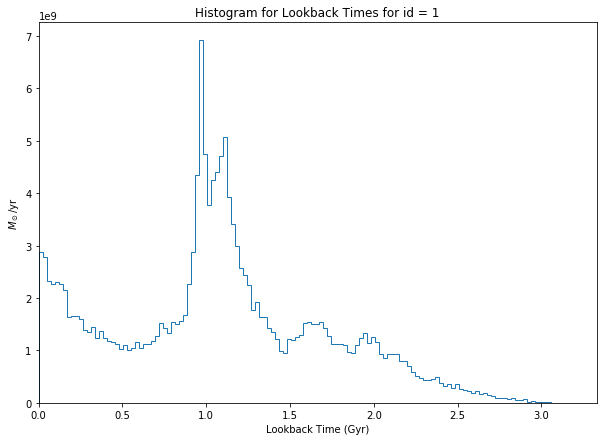

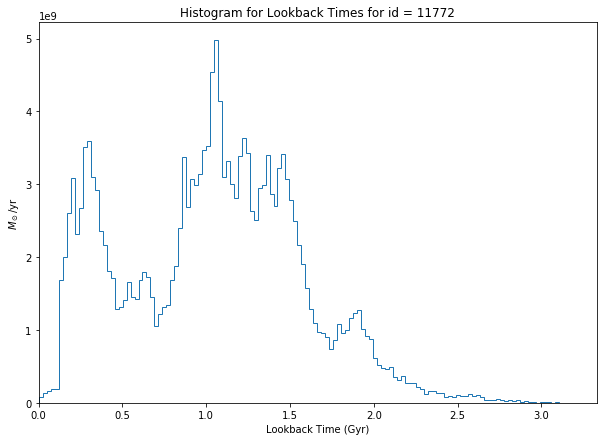

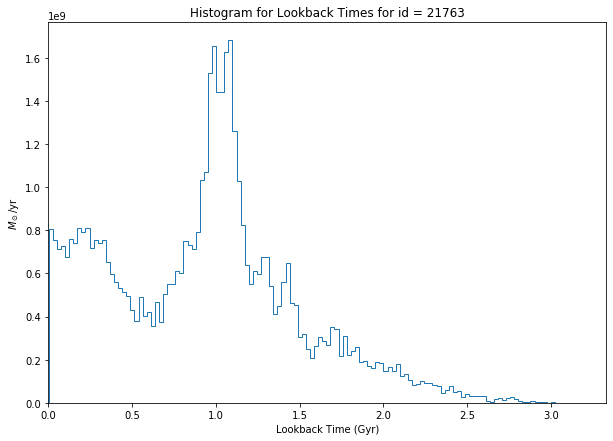

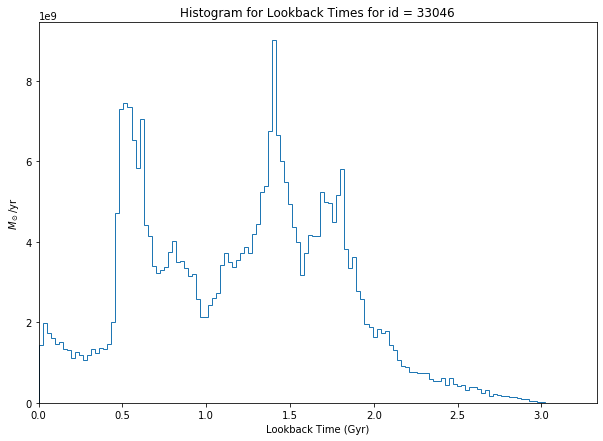

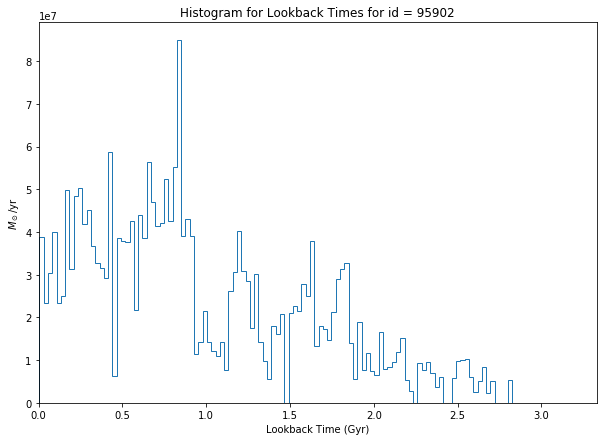

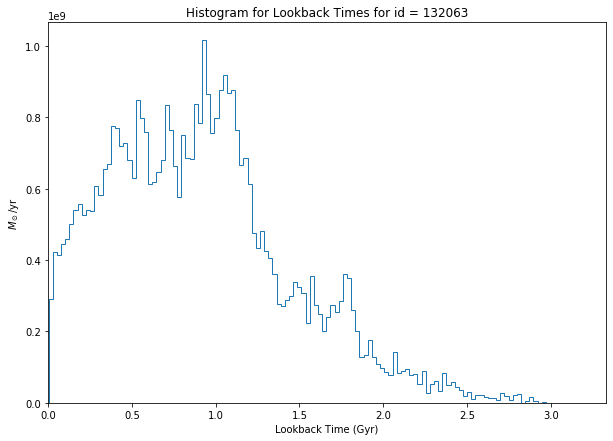

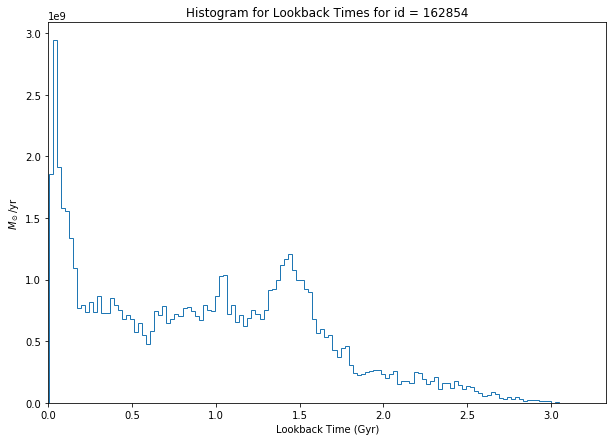

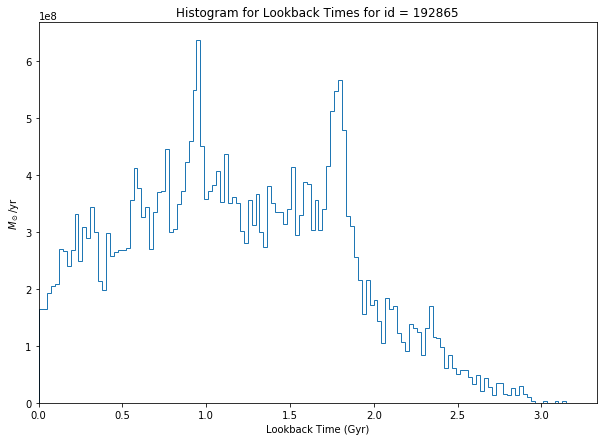

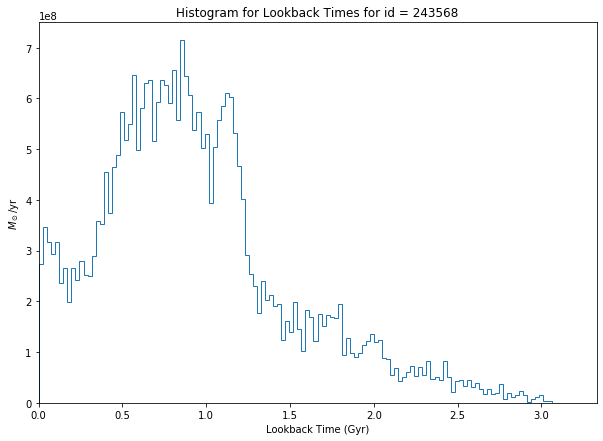

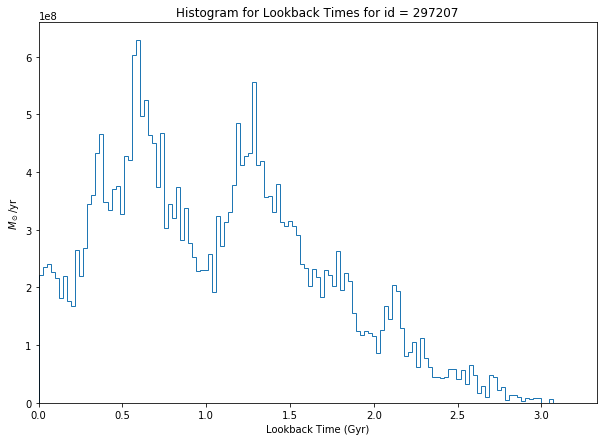

In [8]:
LookbackTime_hist(redshift = 2.0, ids = [1, 11772, 21763, 33046, 95902, 132063, 162854, 192865, 243568, 297207])
#I was wondering if there's some way to get around the warning message